In [1]:
import pandas as pd


pd.__version__

'1.1.5'

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta

In [3]:
GES=pd.read_excel('./data/matrix.xlsx',skiprows=3,sheet_name=1,header=[0,1])
GES[[('Unnamed: 0_level_0','Год'), ('Unnamed: 1_level_0','N месяца')]] = GES[[('Unnamed: 0_level_0','Год'), ('Unnamed: 1_level_0','N месяца')]].fillna(method='ffill', axis=0).astype(int)
GES['data_g']=GES[('Unnamed: 0_level_0','Год')].astype(int)
GES['data_m']=GES[('Unnamed: 1_level_0','N месяца')].astype(int)
GES['data']=pd.to_datetime(GES['data_g'].astype(str)+'-'+GES['data_m'].astype(str) +'-01')
GES=GES.set_index('data')
GES=GES.drop(([ ('Unnamed: 0_level_0','Год'), ('Unnamed: 1_level_0','N месяца'),'data_g','data_m']), axis=1)
GES=GES.fillna(0)

cz='Сибирь'
GES=GES[cz]

GES=GES/1000
GES.head(3)

,Богучанская ГЭС,Братская ГЭС,Иркутская ГЭС,Красноярская ГЭС,Майнская ГЭС,Мамаканская ГЭС,Новосибирская ГЭС,Саяно-Шушенская ГЭС,Усть-Илимская ГЭС
data,,,,,,,,,
2007-01-01,0.0,2196.020,306.768,1392.65,154.100,12.288,89.52,1826.8,1895.9
2007-02-01,0.0,2113.641,296.814,1313.09,117.313,8.280,91.68,1534.1,1713.8
2007-03-01,0.0,2247.911,331.881,1688.29,133.300,8.988,105.81,1921.1,1891.6


In [4]:
target=pd.read_excel('./IRI/target.xlsx') 
target

,Unnamed: 0,Приток_IRK,Приток_BRA,Приток_UIM,Приток_BOG,Приток_SHA,Приток_KRA,Сброс_IRK,Сброс_BRA,Сброс_UIM,Сброс_BOG,Сброс_SHA,Сброс_KRA,Уровень_IRK,Уровень_BRA,Уровень_UIM,Уровень_BOG,Уровень_SHA,Уровень_KRA
0,1901-02-01,420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1901-03-01,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1901-04-01,950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-05-01,2170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-06-01,4300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,2021-01-01,350,2221.0,3640.0,3690.0,480.0,1340.0,2030.0,3640.0,3689.0,3487.0,1061.0,2620.0,456.51,399.77,295.77,207.58,524.56,234.88
1440,2021-02-01,300,1870.0,3572.0,3711.0,460.0,1340.0,2490.0,3572.0,3527.0,4000.0,1504.0,2620.0,456.42,398.99,295.76,207.49,519.16,234.88
1441,2021-03-01,400,2280.0,3047.0,3588.0,450.0,1460.0,2100.0,3047.0,3555.0,3574.0,1072.0,3400.0,456.31,398.31,295.58,207.13,509.95,231.54
1442,2021-04-01,1000,3150.0,3046.0,3195.0,890.0,2190.0,2400.0,3046.0,3126.0,3106.0,972.0,3740.0,456.21,398.50,294.55,207.06,500.37,229.48


<AxesSubplot:>

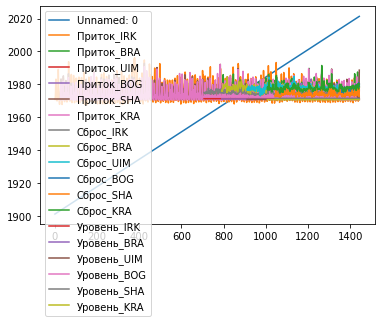

In [5]:
target.plot()

In [6]:
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

Unnamed: 0


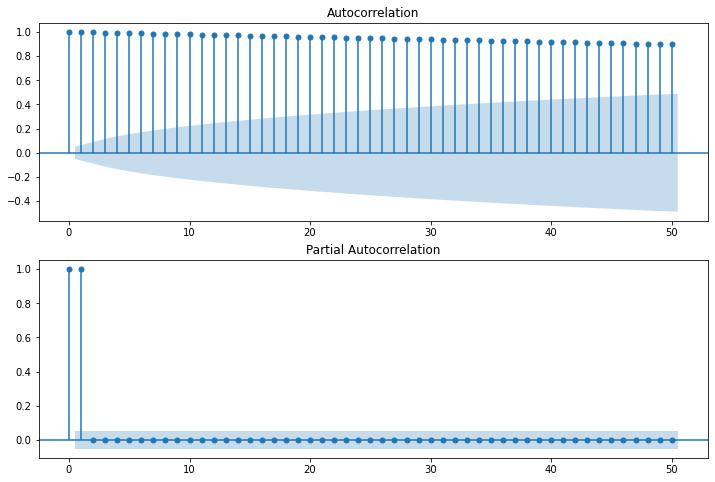

Приток_IRK


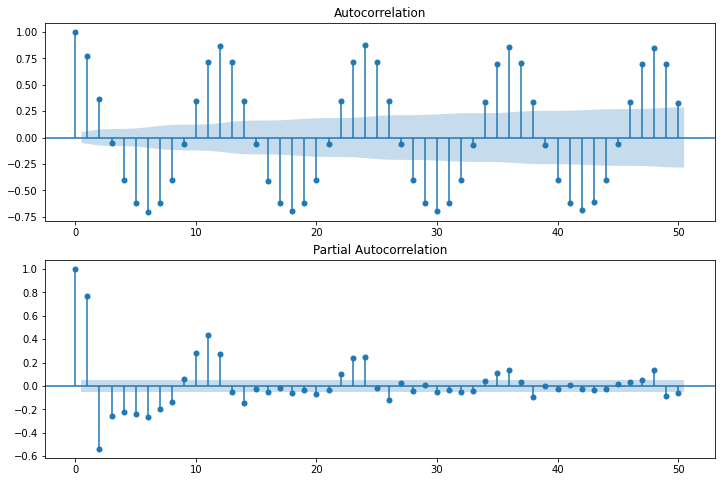

Приток_BRA


/opt/conda/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


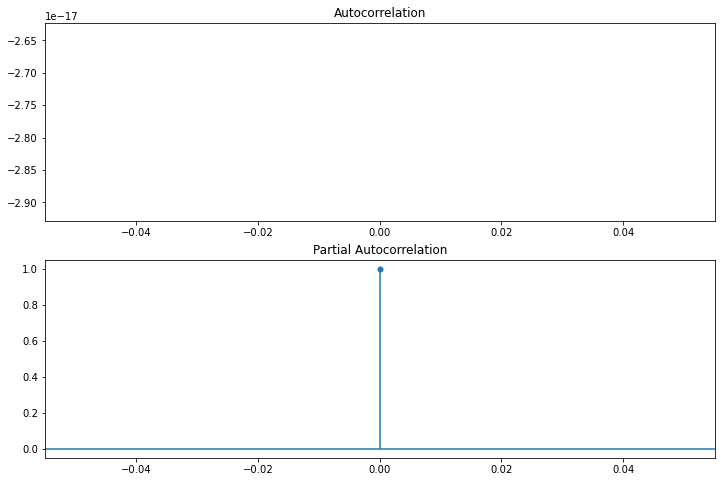

Приток_UIM


/opt/conda/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


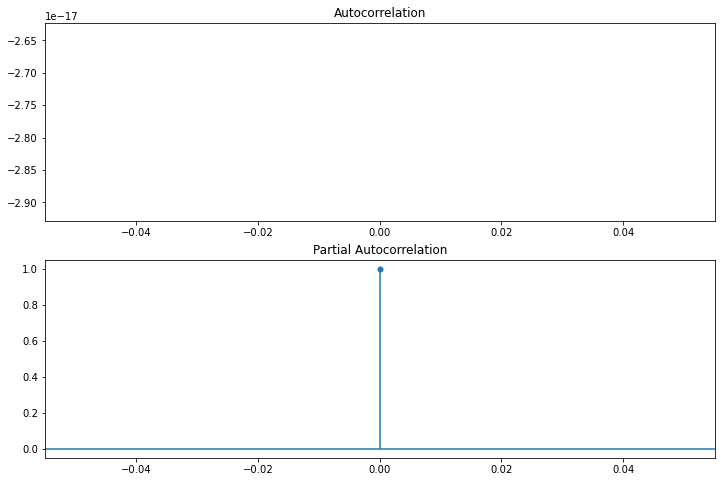

Приток_BOG


/opt/conda/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


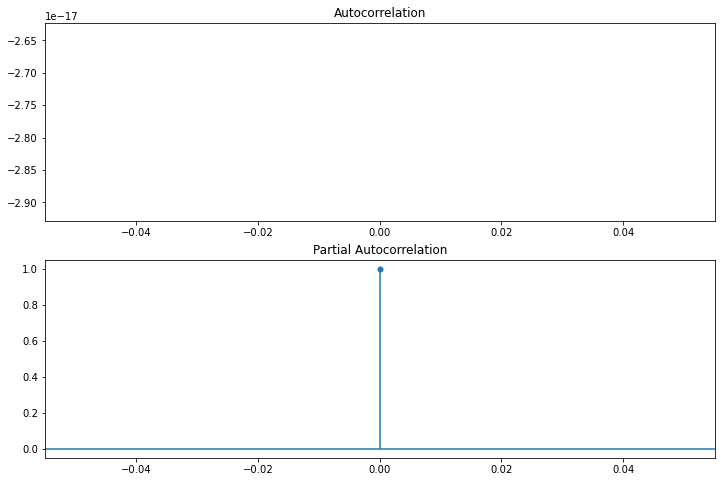

Приток_SHA


/opt/conda/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


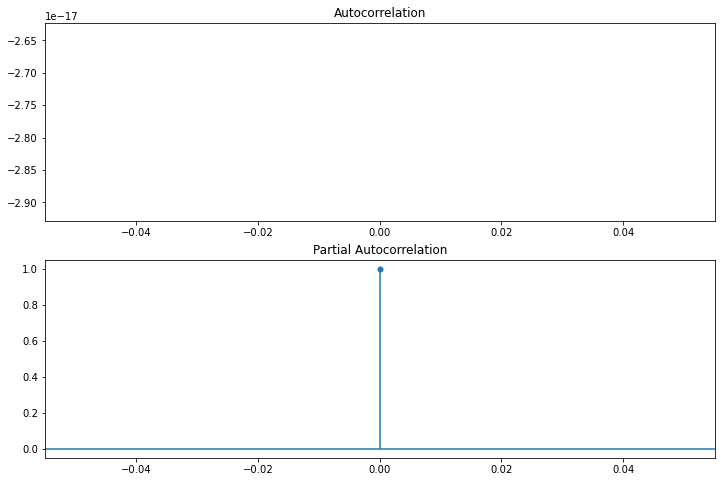

Приток_KRA


/opt/conda/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


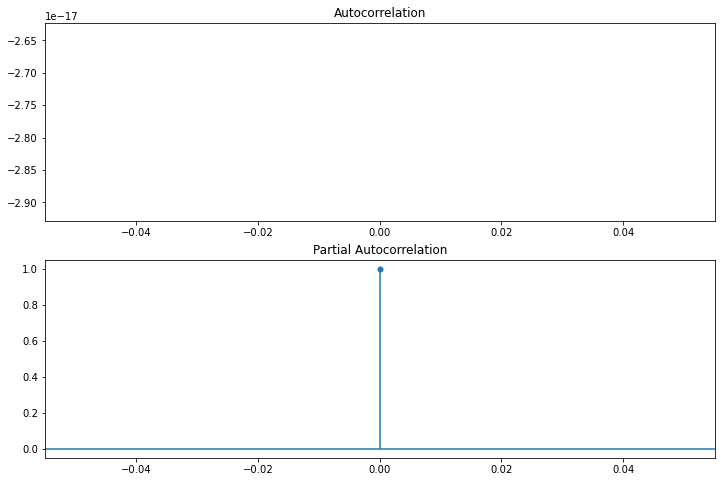

Сброс_IRK


/opt/conda/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


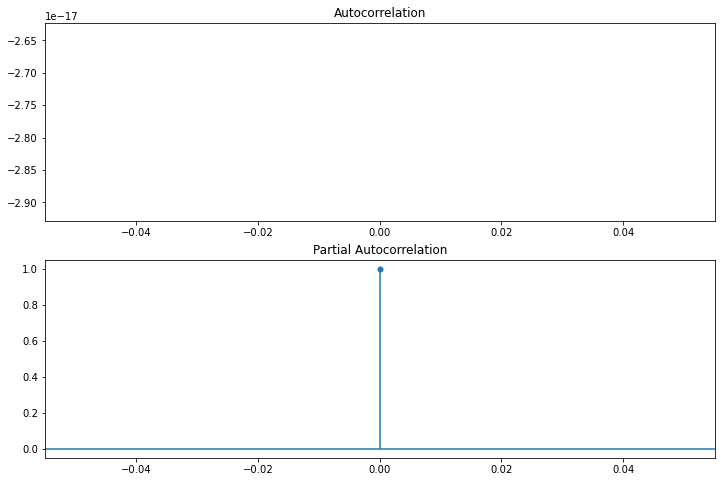

Сброс_BRA


/opt/conda/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


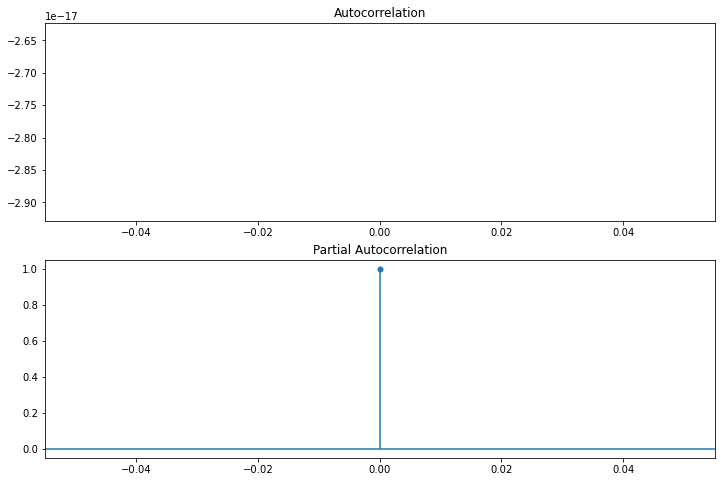

Сброс_UIM


/opt/conda/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


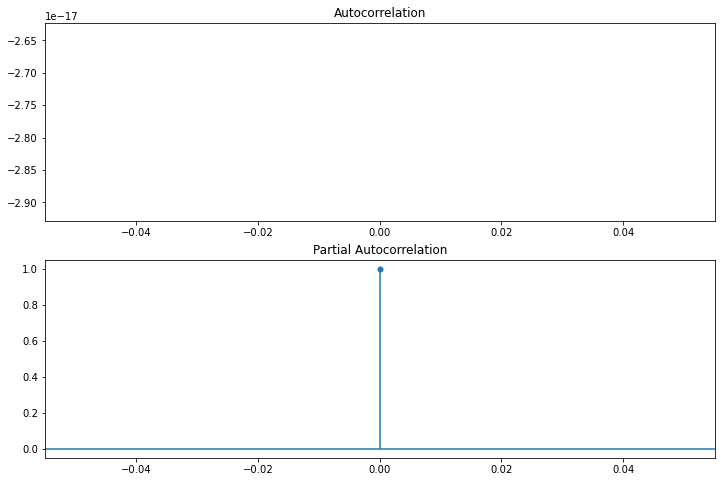

Сброс_BOG


/opt/conda/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


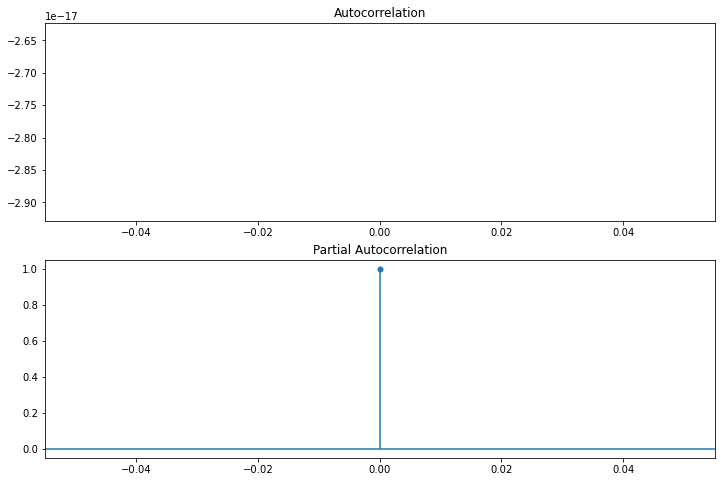

Сброс_SHA


/opt/conda/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


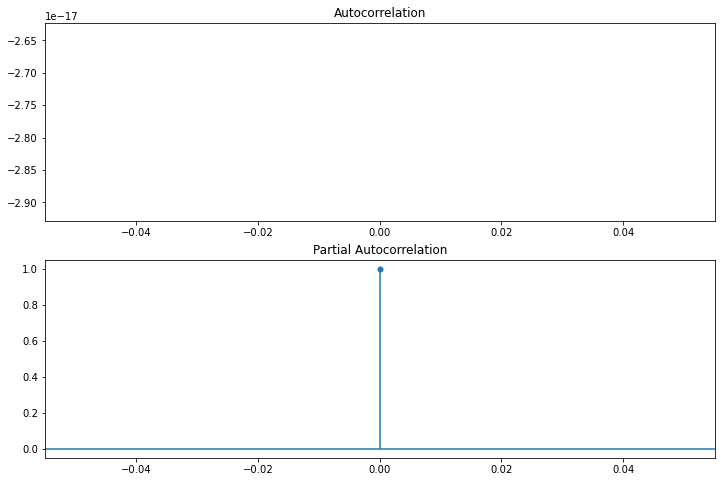

Сброс_KRA


/opt/conda/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


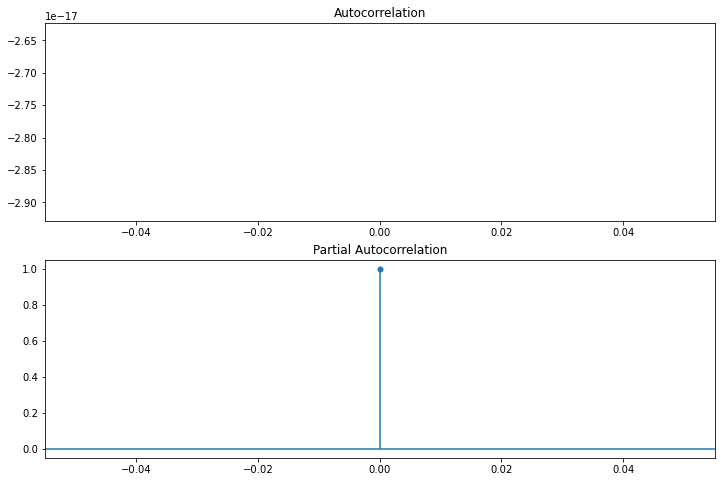

Уровень_IRK


/opt/conda/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


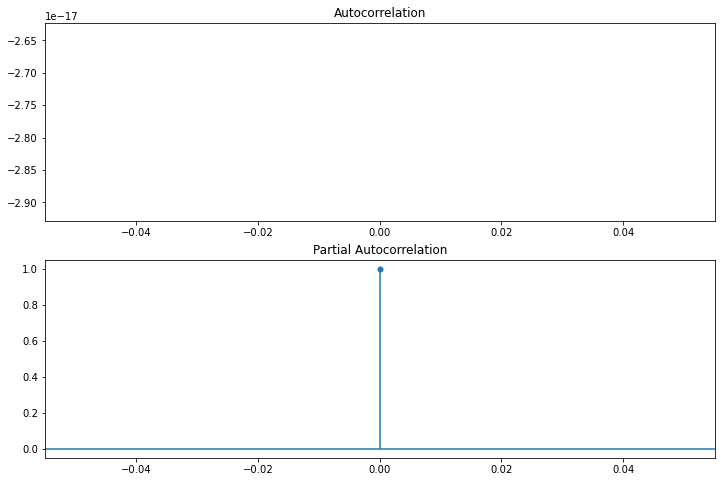

Уровень_BRA


/opt/conda/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


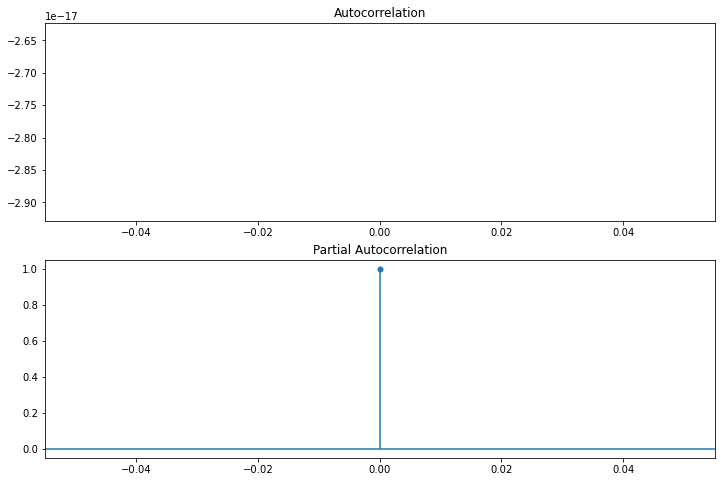

Уровень_UIM


/opt/conda/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


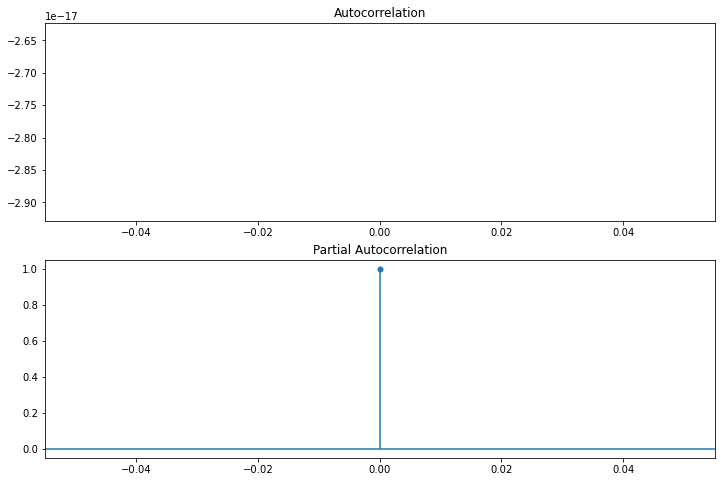

Уровень_BOG


/opt/conda/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


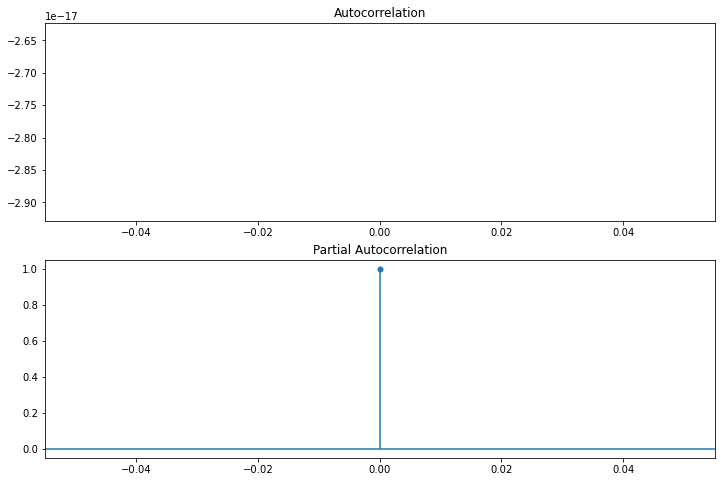

Уровень_SHA


/opt/conda/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


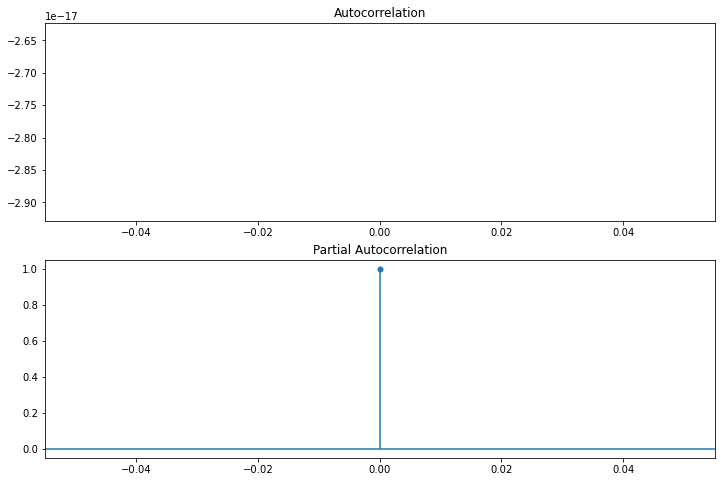

Уровень_KRA


/opt/conda/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


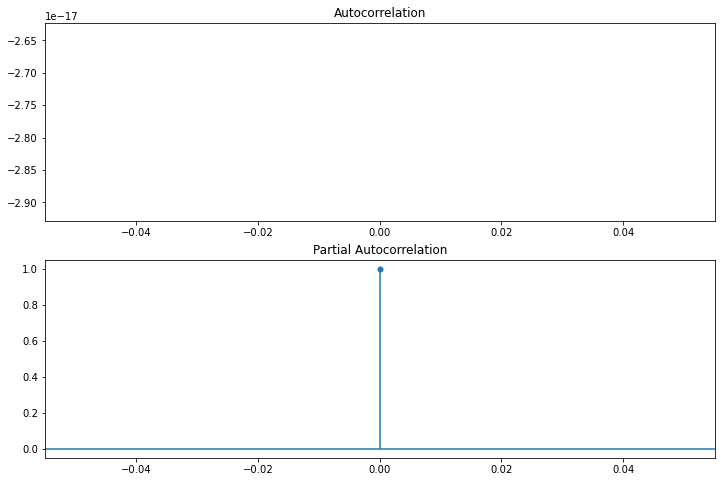

In [7]:
import statsmodels.api as sm  
for col in target:
    #автокорреляция целевой функции
    print(col)
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(target[col].values.squeeze(), lags=50, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(target[col], lags=50, ax=ax2)
    plt.show()

Unnamed: 0


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

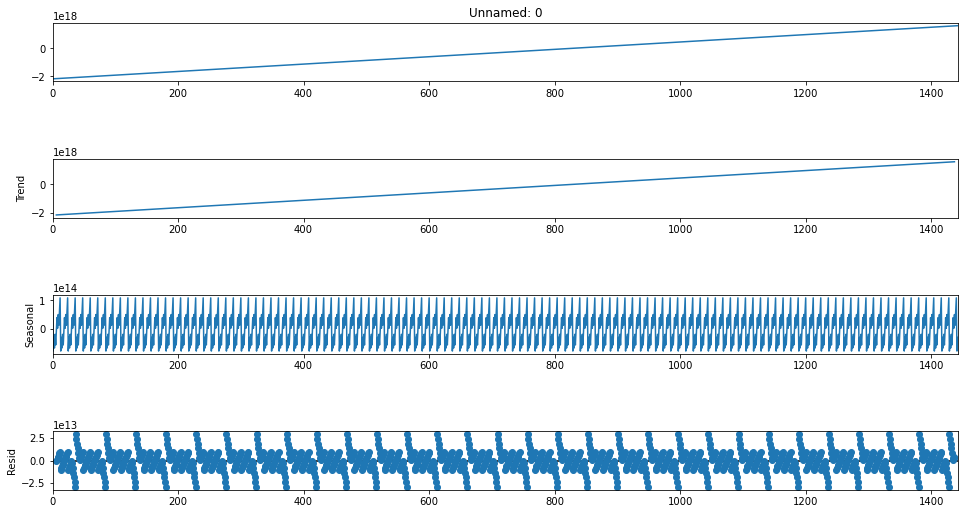

Приток_IRK


<Figure size 432x288 with 0 Axes>

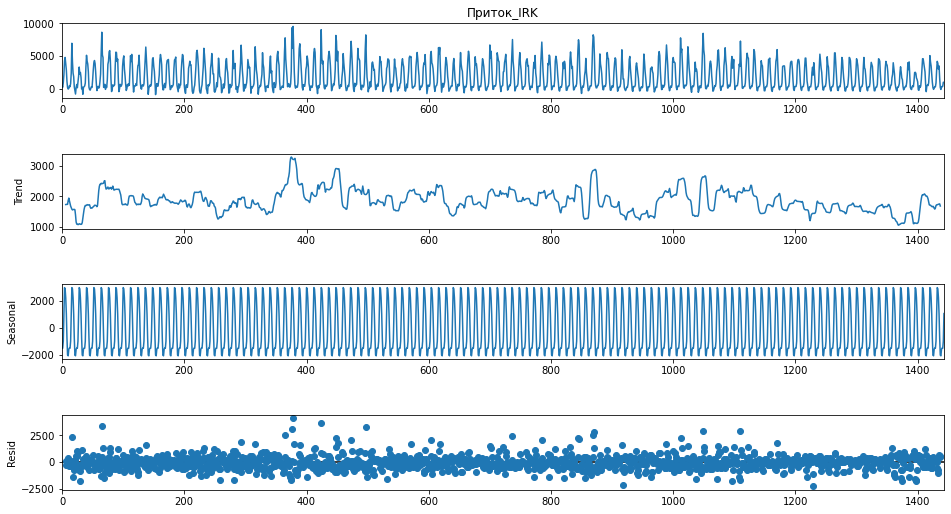

Приток_BRA


<Figure size 432x288 with 0 Axes>

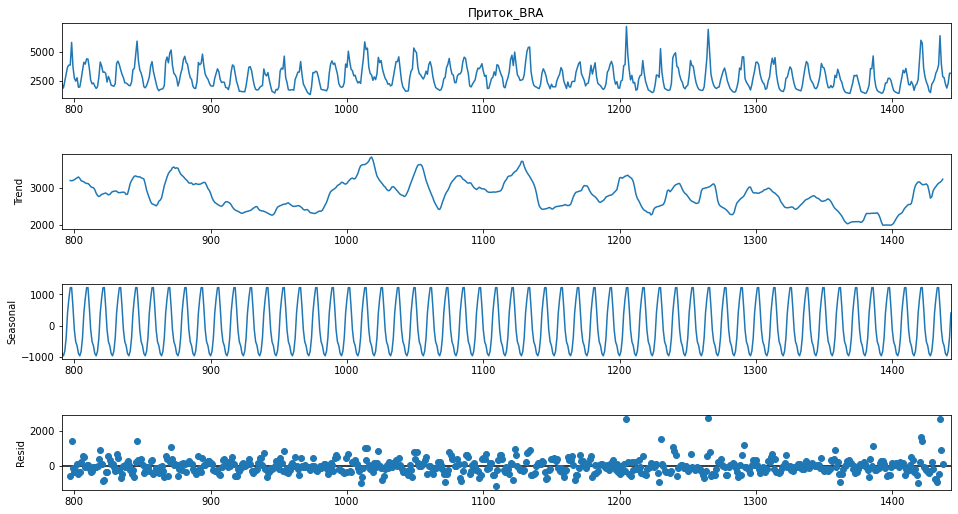

Приток_UIM


<Figure size 432x288 with 0 Axes>

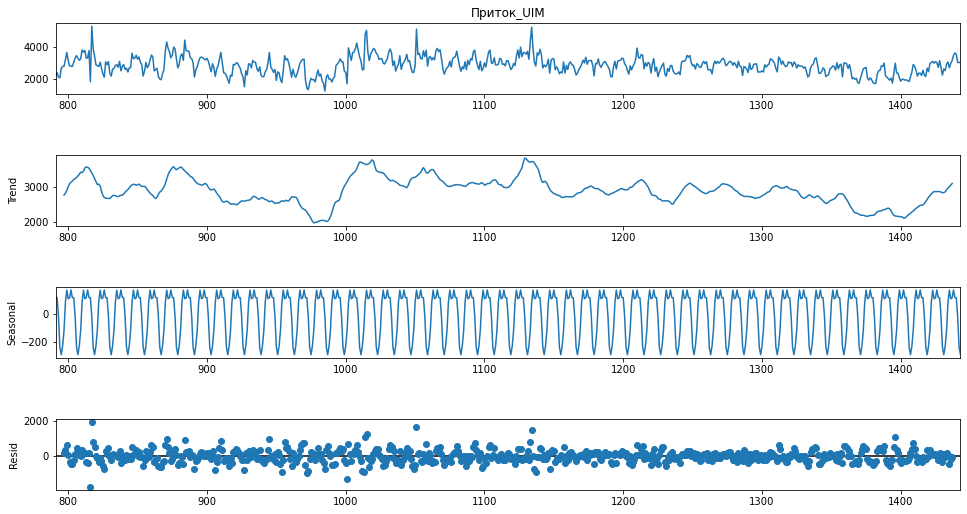

Приток_BOG


<Figure size 432x288 with 0 Axes>

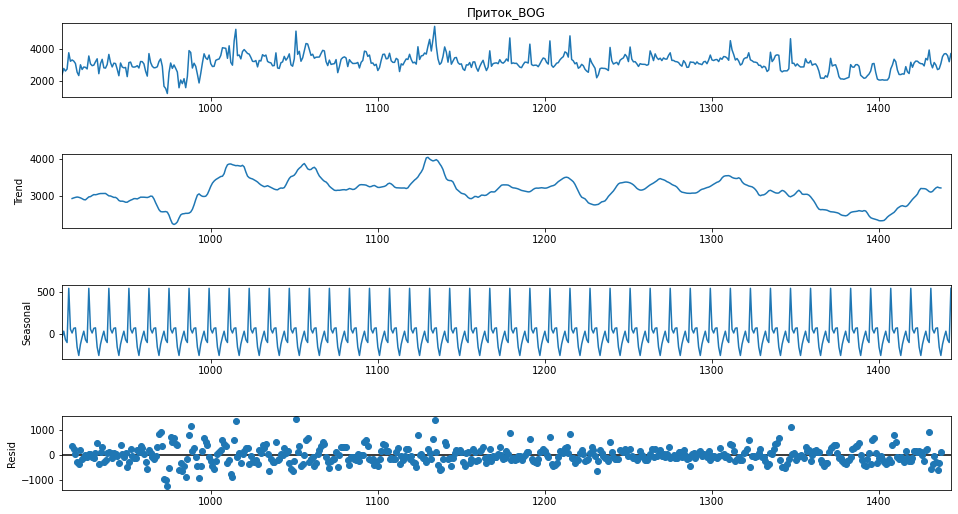

Приток_SHA


<Figure size 432x288 with 0 Axes>

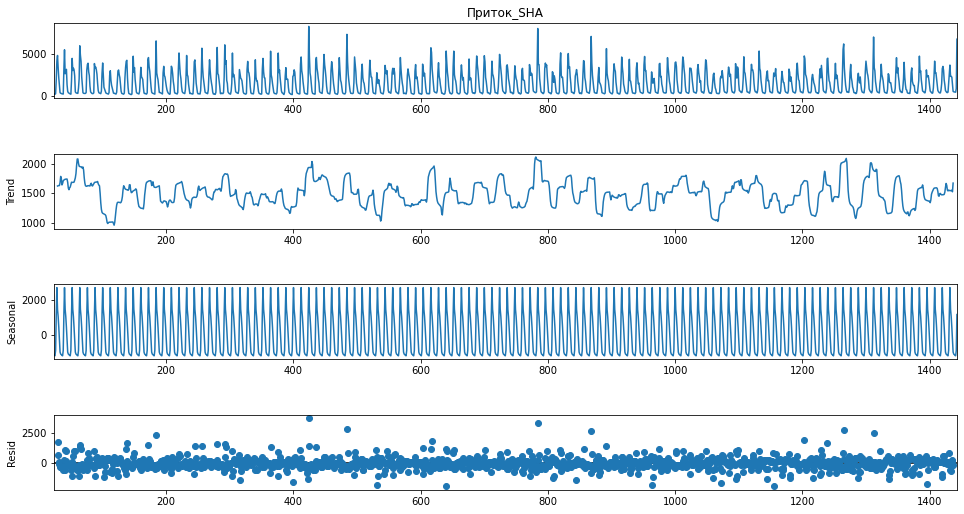

Приток_KRA


<Figure size 432x288 with 0 Axes>

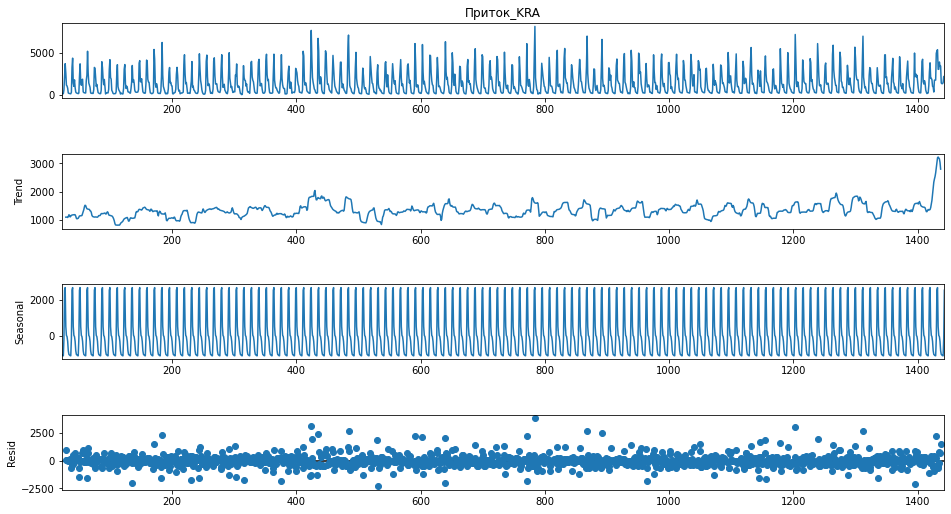

Сброс_IRK


<Figure size 432x288 with 0 Axes>

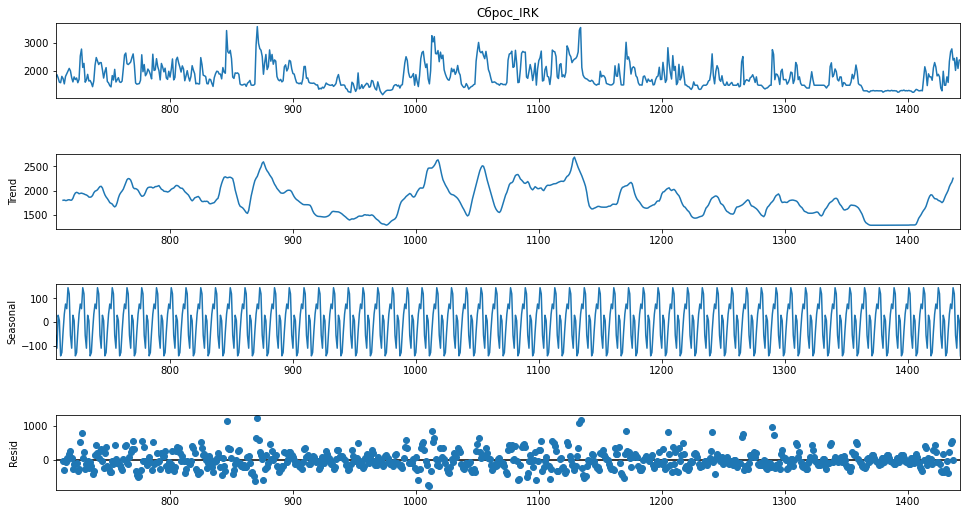

Сброс_BRA


<Figure size 432x288 with 0 Axes>

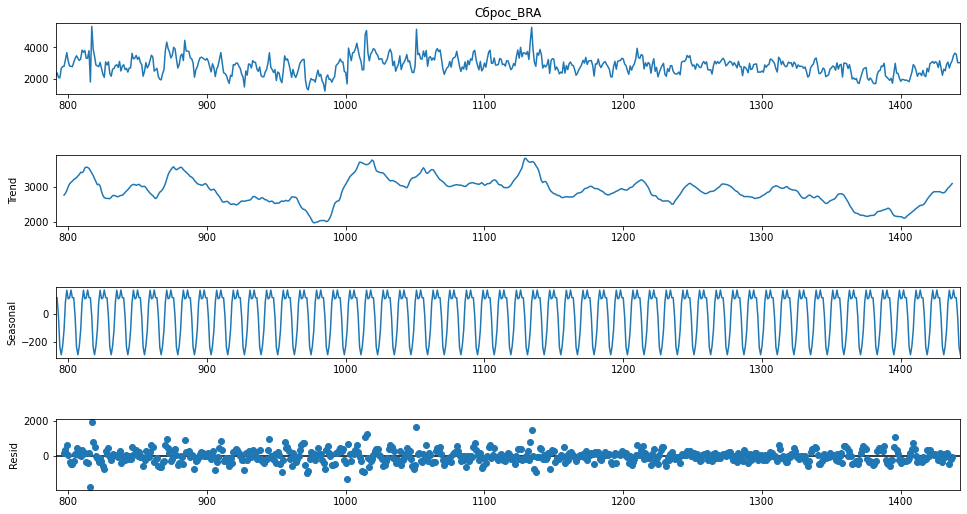

Сброс_UIM


<Figure size 432x288 with 0 Axes>

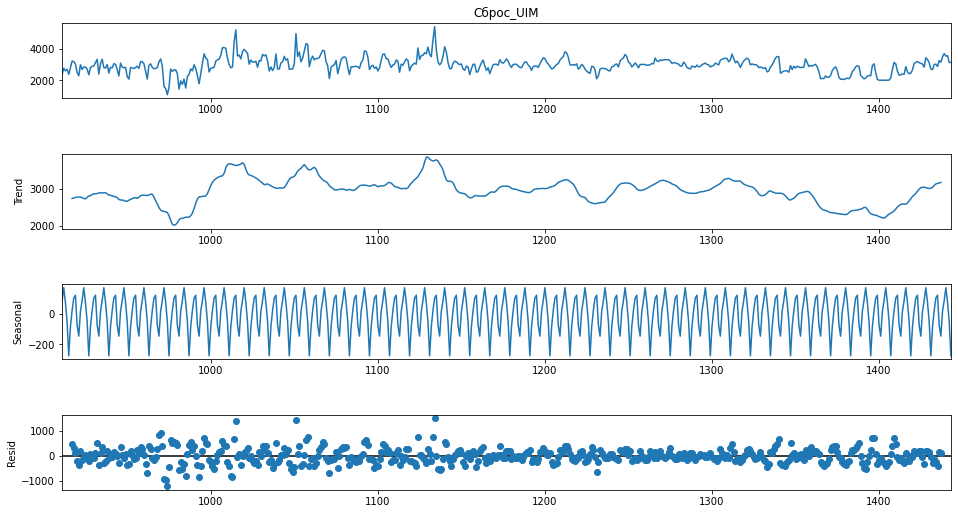

Сброс_BOG


<Figure size 432x288 with 0 Axes>

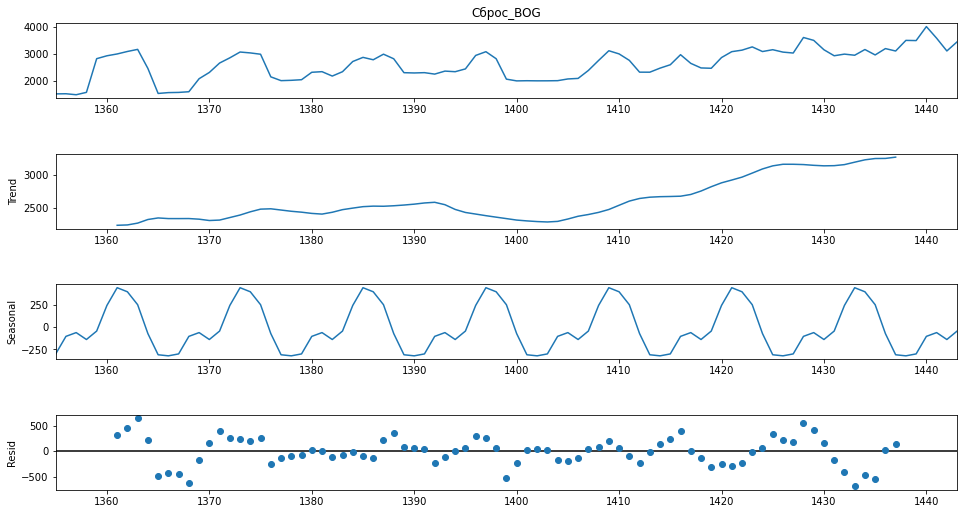

Сброс_SHA


<Figure size 432x288 with 0 Axes>

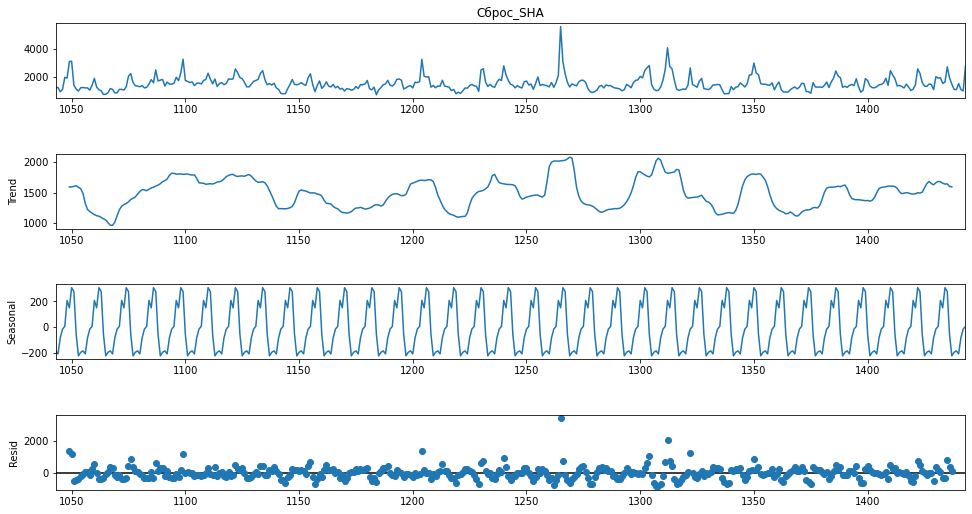

Сброс_KRA


<Figure size 432x288 with 0 Axes>

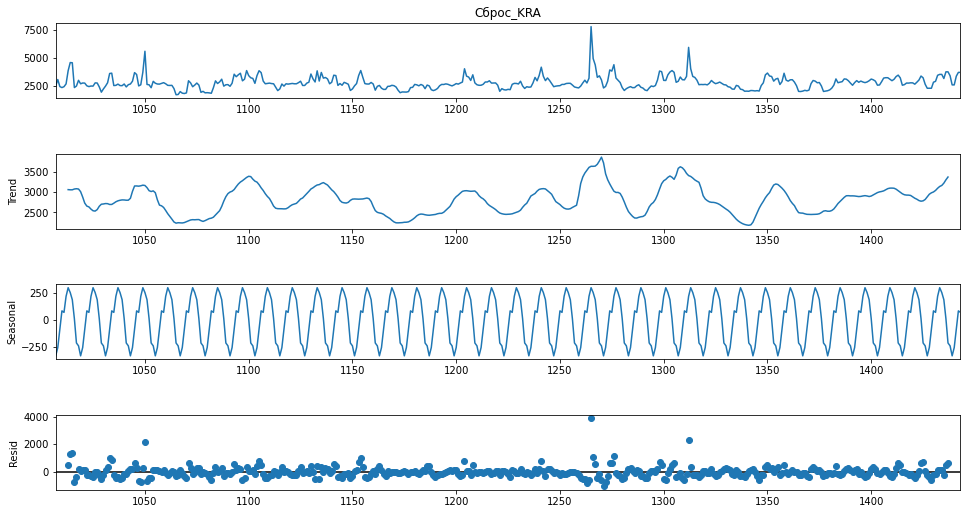

Уровень_IRK


<Figure size 432x288 with 0 Axes>

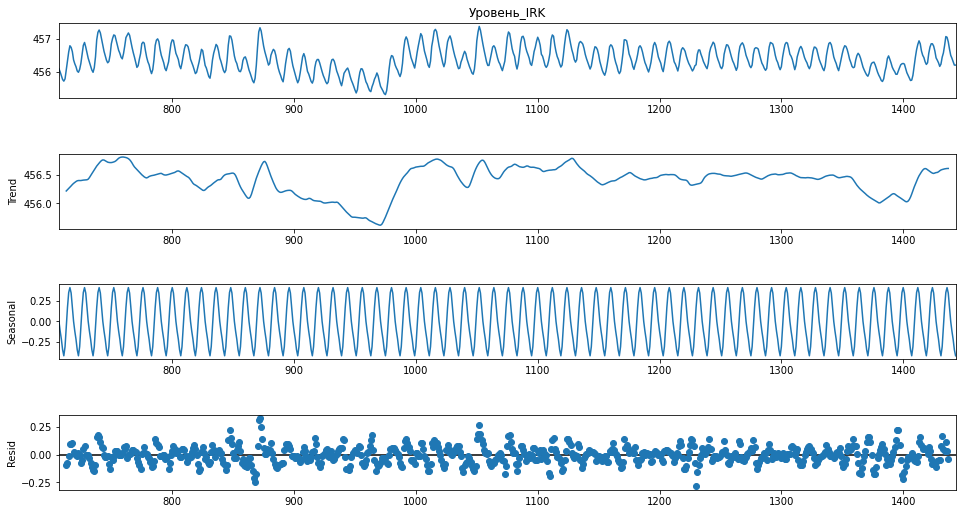

Уровень_BRA


<Figure size 432x288 with 0 Axes>

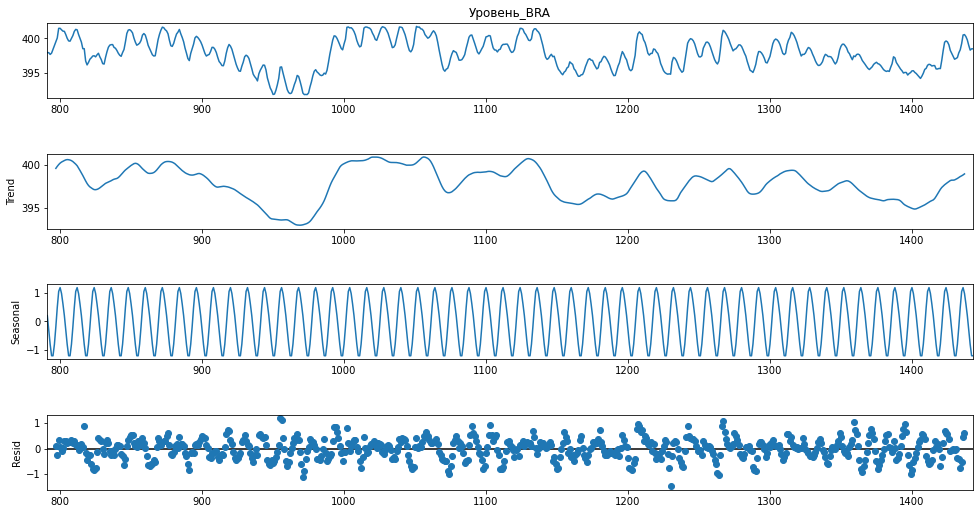

Уровень_UIM


<Figure size 432x288 with 0 Axes>

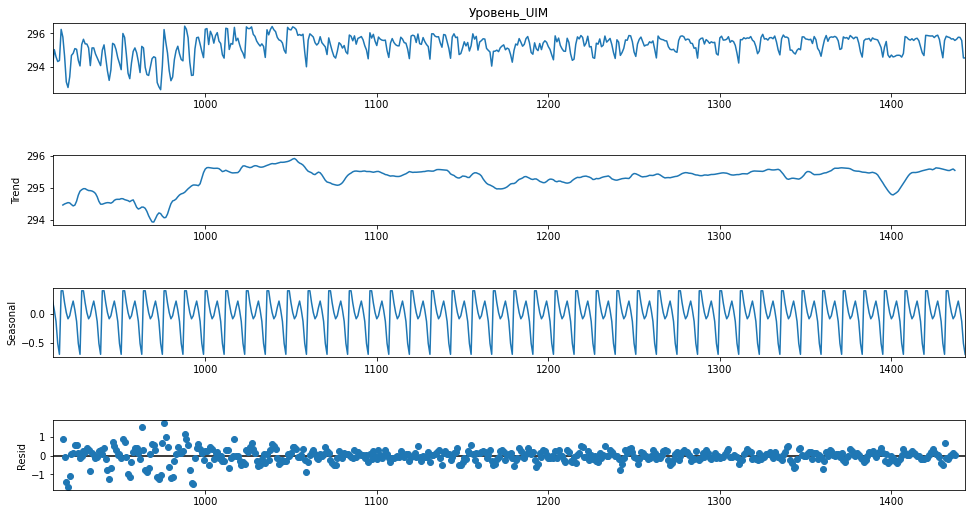

Уровень_BOG


<Figure size 432x288 with 0 Axes>

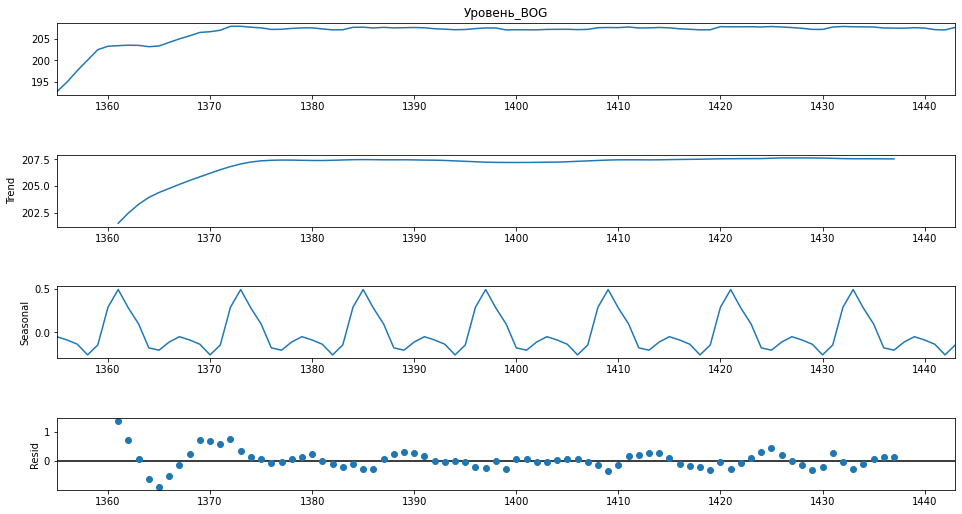

Уровень_SHA


<Figure size 432x288 with 0 Axes>

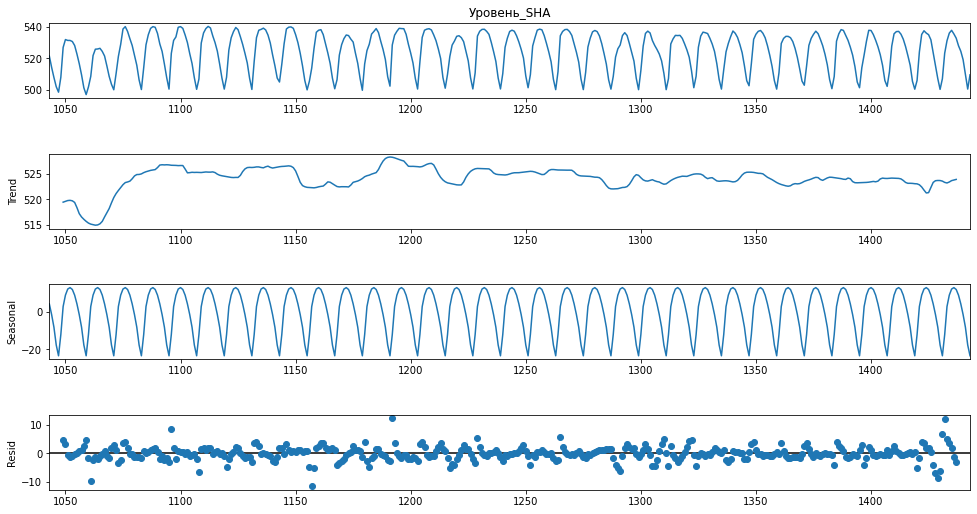

Уровень_KRA


<Figure size 432x288 with 0 Axes>

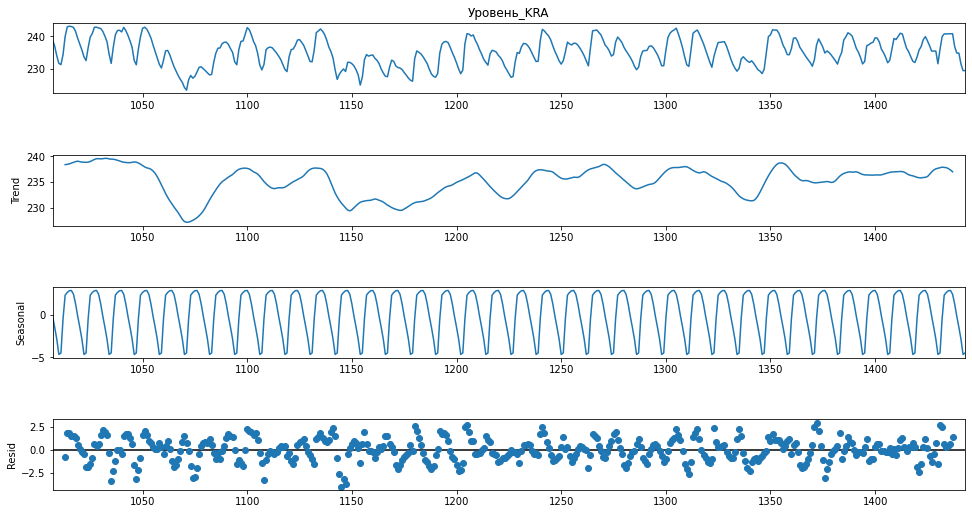

In [8]:
for col in target:
    print(col)
    decomposition = seasonal_decompose(target[col].dropna(axis=0), freq=12)  
    fig = plt.figure()  
    fig = decomposition.plot()  
    fig.set_size_inches(15, 8)
    plt.show()

In [9]:
import itertools
import warnings

In [10]:
god=2021

In [11]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
ml_pred=pd.DataFrame()
for stan in target:
    #stan='Выработка_Иркутская ГЭС'
    print(stan)
    data_ml=target[stan].dropna()
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    print(pdq)
    
    
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    
    print('Examples of parameter combinations for Seasonal ARIMA...')
    print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
    print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
    print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
    print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
    
    
    
    C_order=[]
    C_seasonal_order=[]
    aics=[]
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(data_ml,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
    
                results = mod.fit()
    
                print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
                
                C_order.append(param)
                C_seasonal_order.append(param_seasonal)
                aics.append((results.aic))
            except:
                continue
                
                
    c_id=aics.index(min(aics))
    
    
    mod = sm.tsa.statespace.SARIMAX(data_ml,
                                    order=C_order[c_id],
                                    seasonal_order=C_seasonal_order[c_id],
                                    enforce_stationarity=True,
                                    enforce_invertibility=True)
    
    results = mod.fit()
    
    print(results.summary().tables[1])
    
    
    
    pred = results.get_prediction(start=data_ml.index.min(),end='2023-12-01')
    pred_ci = pred.conf_int()
    
    ml_pred[stan]=pred.predicted_mean

Unnamed: 0
[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


ValueError: min() arg is an empty sequence

In [12]:
aics

[]

In [ ]:
data_ml.index